In [1]:
import pandas as pd

In [2]:
file_path = '/home/habib/Desktop/flash_ssd_simulator_web/trace/trace/ssdtrace-00'
# Initialize an empty list to store filtered rows
filtered_rows = []

# Use chunksize to read the file in smaller parts
chunksize = 1000000  # Adjust based on memory requirements
filtered_df = pd.DataFrame()
for chunk in pd.read_csv(
    file_path,
    delim_whitespace=True,  # Use whitespace as the delimiter
    header=None,            # No header in the file
    usecols=range(9),       # Only consider the first 9 columns
    chunksize=chunksize,    # Read in chunks
    engine="python"         # Use the Python engine to handle bad lines gracefully
):
    filtered_df = pd.concat([filtered_df,chunk])
    
print(filtered_df.head())

       0  1  2         3     4  5   6       7  8
0  259,2  0  1  0.000000  4020  Q   R  282624  +
1  259,2  0  2  0.000002  4020  G   R  282624  +
2  259,2  0  3  0.000004  4020  U   N  [java]  1
3  259,2  0  4  0.000004  4020  I  RS  282624  +
4  259,2  0  5  0.000005  4020  D  RS  282624  +


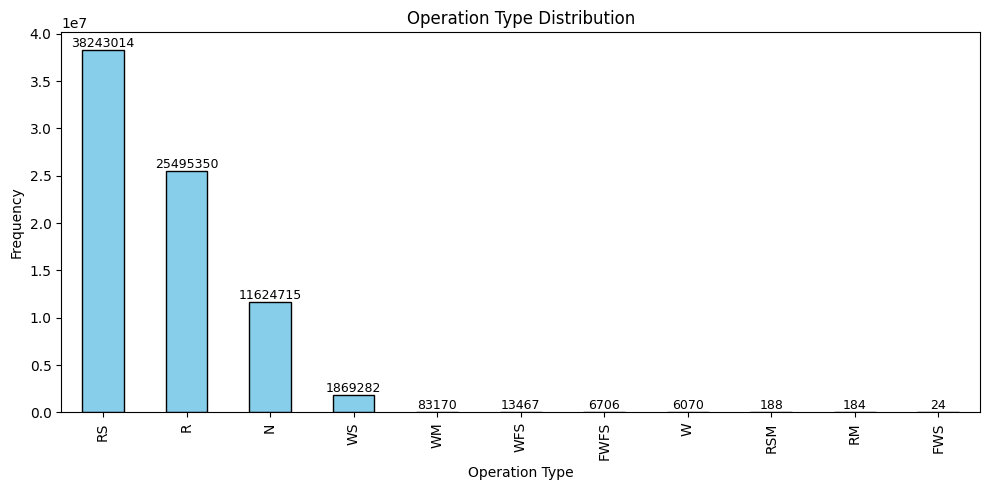

In [4]:
import matplotlib.pyplot as plt

operationType = filtered_df[6].value_counts()

plt.figure(figsize=(10, 5))
operationType.plot(kind='bar', color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Operation Type Distribution')
plt.xlabel('Operation Type')
plt.ylabel('Frequency')

for i, v in enumerate(operationType):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=9)

plt.tight_layout()    

plt.show()